# Welcome to the Tequila Calculator Tutorial.

In this tutorial, you will learn how to create a quantum circuit that simulates addition using Tequila. We also compare the performance of various backends that Tequila uses. We hope you enjoy

## Step 1: Install Tequila
Run this cell to install Tequila on your device.

In [1]:
pip install git+https://github.com/aspuru-guzik-group/tequila.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aspuru-guzik-group/tequila.git to /tmp/pip-req-build-0gd1l0gx
  Running command git clone -q https://github.com/aspuru-guzik-group/tequila.git /tmp/pip-req-build-0gd1l0gx
     |████████████████████████████████| 38.1 MB 352 kB/s 
     |████████████████████████████████| 1.0 MB 46.2 MB/s 
     |████████████████████████████████| 451 kB 60.3 MB/s 
     |████████████████████████████████| 1.8 MB 47.0 MB/s 
     |████████████████████████████████| 541 kB 52.5 MB/s 
  Created wheel for tequila-basic: filename=tequila_basic-1.7.0-py3-none-any.whl size=251972 sha256=9c1024f64f6828cd8b88f285db2e9cff5b311973943b1714d0b7e608deb1d063
  Stored in directory: /tmp/pip-ephem-wheel-cache-847c60w4/wheels/1d/22/ed/b52275443f28fbfe5dc0ed6e9637b777b241af74b9db038d2b
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=4c1ce9b90733bdd4060d9ae5c5e6d

## Step 2:

Install Qiskit on your device as well. Since it is one of the simulators we will use.

In [11]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 3: Import Statements

Let's import numpy and tequila in a Python-friendly way.

In [2]:
import tequila as tq
import numpy
from numpy import pi
tq.show_available_simulators()

backend         | wfn        | sampling   | noise      | installed 
--------------------------------------------------------------------
qulacs_gpu      | False      | False      | False      | False     
qulacs          | True       | True       | True       | True      
qibo            | False      | False      | False      | False     
qiskit          | False      | False      | False      | False     
cirq            | True       | True       | True       | True      
pyquil          | False      | False      | False      | False     
symbolic        | True       | False      | False      | True      
qlm             | False      | False      | False      | False     


## Step 4: Create our Basic Add Statement

Let's first see how to add two qubits initialized at various values. We have 2 helpers functions - module (the basic circuit) and find_carry (finds what digit to carry)

In [3]:
#adapted from https://www.quantum-inspire.com/kbase/full-adder/
addcircuit = tq.gates.Toffoli(first = 0, second = 1, target = 3) + tq.gates.CNOT(target=1, control = 0)
addcircuit = addcircuit + tq.gates.Toffoli(first = 1, second = 2, target = 3) + tq.gates.CNOT(target=2, control = 1) + tq.gates.CNOT(target=1, control = 0)
tq.draw(addcircuit)


def module(q, i, x, a):
  #make sure q is initialized
  q = q + tq.gates.CX(i, 2*len(a)+i)
  q = q + tq.gates.CX(i+1,2*len(a)+i)
  q.measure(2*len(a)+i,x[0])
  find_carry(q,i,i+1,2*len(a)+i-1,2*len(a)+i,2*len(a)+i+1,x)
  q.cx(2*len(a)+i-1,2*len(a)+i)
  q.barrier()
  
def find_carry(qc, a,b, c,d,e, x):
  qc.ccx(a,b,e).c_if(x,0)
  qc.ccx(c,d,e).c_if(x,1)

#documentation here: https://nbviewer.org/github/tequilahub/tequila-tutorials/blob/main/BasicUsage.ipynb
#unsure how to initialize qubit values, thing doing circuit correct but depends on if numbers in first, target, etc. refer to value or 
#part of circuit (assuming refers to part of circuit)
a = tq.Variable("a")
b = tq.Variable("b")

# set the value we want to simulate
variables = {"a" : 1.0, "b": 0.0}
wfn = tq.simulate(addcircuit, variables=variables)


0: ───@───@───────────@───
      │   │           │
1: ───@───X───@───@───X───
      │       │   │
2: ───┼───────@───X───────
      │       │
3: ───X───────X───────────


## Step 5: Generalized Circuit 

Below is the generalized circuit for addition (where the input can be any value).

In [9]:
#establish variable values here, q_0, q_1 are ones digits, q_2, q_3 are tens digits
qc_two = tq.gates.X(0)
qc_two = qc_two + tq.gates.X(1)
qc_two = qc_two + tq.gates.X(3)

qc_two = qc_two + tq.gates.CX(0, 4)
qc_two = qc_two + tq.gates.CX(1, 4)
qc_two = qc_two + tq.gates.Toffoli(0,1,5)

qc_two = qc_two + tq.gates.CX(2, 6)
qc_two = qc_two + tq.gates.CX(3, 6)
qc_two = qc_two + tq.gates.Toffoli(2,3,7)
qc_two = qc_two + tq.gates.Toffoli(5,6,8)
qc_two = qc_two + tq.gates.CX(5, 6)
qc_two = qc_two + tq.gates.X(7)
qc_two = qc_two + tq.gates.X(8)
qc_two = qc_two + tq.gates.Toffoli(7, 8, 9)
qc_two = qc_two + tq.gates.X(9)

# qc_two.x(0)
# qc_two.x(1)
# qc_two.x(3)
# qc_two.barrier()

# qc_two.cx(0,4)
# qc_two.cx(1,4)
# qc_two.ccx(0,1,5)
# qc_two.barrier()

# qc_two.cx(2,6)
# qc_two.cx(3,6)
# qc_two.ccx(2,3,7)
# qc_two.ccx(5,6,8)
# qc_two.cx(5,6)
# qc_two.x(7)
# qc_two.x(8)
# qc_two.ccx(7,8,9)
# qc_two.x(9)
# qc_two.barrier()

# qc_two.measure(4,0)
# qc_two.measure(6,1)
# qc_two.measure(9,2)

tq.draw(qc_two)
measurements = tq.simulate(qc_two, backend='cirq')
#list of 100s, 10s, 1s quibit values
measurement = [str(measurements)[-8], str(measurements)[-6], str(measurements)[-3]]
measurement.reverse()
print(str(measurements))
print(measurement)

      ┌──┐   ┌──┐   ┌──┐
0: ────X──────@────────────@───────────────────
              │            │
1: ────X──────┼──────@─────@───────────────────
              │      │     │
2: ─────@─────┼──────┼@────┼───────────────────
        │     │      ││    │
3: ────X┼─────┼@─────┼@────┼───────────────────
        │     ││     ││    │
4: ─────┼─────X┼─────X┼────┼───────────────────
        │      │      │    │
5: ─────┼──────┼──────┼────X───@───@───────────
        │      │      │        │   │
6: ─────X──────X──────┼────────@───X───────────
                      │        │
7: ───────────────────X────X───┼───────@───────
                               │       │
8: ────────────────────────────X───X───@───────
                                       │
9: ────────────────────────────────────X───X───
      └──┘   └──┘   └──┘
+1.0000|1101010101> 
['1', '0', '0']


In [5]:
tq.draw(qc_two)

      ┌──┐   ┌──┐   ┌──┐
0: ────X──────@────────────@───────────────────
              │            │
1: ────X──────┼──────@─────@───────────────────
              │      │     │
2: ─────@─────┼──────┼@────┼───────────────────
        │     │      ││    │
3: ────X┼─────┼@─────┼@────┼───────────────────
        │     ││     ││    │
4: ─────┼─────X┼─────X┼────┼───────────────────
        │      │      │    │
5: ─────┼──────┼──────┼────X───@───@───────────
        │      │      │        │   │
6: ─────X──────X──────┼────────@───X───────────
                      │        │
7: ───────────────────X────X───┼───────@───────
                               │       │
8: ────────────────────────────X───X───@───────
                                       │
9: ────────────────────────────────────X───X───
      └──┘   └──┘   └──┘


''

## Step 6: Detailed Generalized Circuit for Any Digit Addition

For more details on how this circuit works, see https://averyparkinson23.medium.com/simulating-a-calculator-using-qiskit-e2a95fff179c

In [12]:
import torch
from matplotlib import pyplot as plt
import numpy as np


In [17]:
def generalTwoDigit(x, y, sim):
  abc = tq.gates.X(0) + tq.gates.X(0)
  for i in range(len(x)):
    i = len(x) - 1 - i
    if x[i] == 1:
      abc = qc_two + tq.gates.X(2*i)
  for j in range(len(y)):
    i = len(y) - 1 - i
    if y[i] == 1:
      abc = qc_two + tq.gates.X(2*i+1)
  abc = abc + tq.gates.CX(0, 4)
  abc = abc + tq.gates.CX(1, 4)
  abc = abc + tq.gates.Toffoli(0,1,5)

  abc = abc + tq.gates.CX(2, 6)
  abc = abc + tq.gates.CX(3, 6)
  abc = abc + tq.gates.Toffoli(2,3,7)
  abc = abc + tq.gates.Toffoli(5,6,8)
  abc = abc + tq.gates.CX(5, 6)
  abc = abc + tq.gates.X(7)
  abc = abc + tq.gates.X(8)
  abc = abc + tq.gates.Toffoli(7, 8, 9)
  abc = abc + tq.gates.X(9)
  #tq.draw(abc)
  measurements = tq.simulate(abc, simulator = sim)
  #list of 100s, 10s, 1s quibit values
  measurement = [str(measurements)[-8], str(measurements)[-6], str(measurements)[-3]]
  measurement.reverse()
  #print(str(measurements))
  #print("Backend =", sim)
  return (''.join(measurement))   

print(generalTwoDigit([0,1], [1, 0], "qiskit"))    


001


## Step 7: Evaluate Runtime on Different Backends
Now, let's evaluate the runtime of our algorithm on Qiskit, Cirq, and Qulacs

In [33]:
import time
import random

# get the start time
st = time.time()

# Generate random inputs x and y
for i in range(1000):
  x = [random.randint(0, 1), random.randint(0, 1)]
  y = [random.randint(0, 1), random.randint(0, 1)]
  # main program
  generalTwoDigit(x, y, "cirq")

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 66.15482687950134 seconds


# Runtime Comparison (seconds):


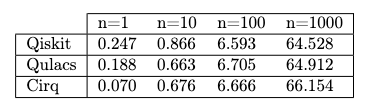
